# Lösungen zu den Aufgaben vom  Python Schnellkurs


In [1]:
import numpy as np

## Übung 1
Schreiben Sie eine Funktion zur Berechnung des Volumens eines Quaders. Länge, Breite und Höhe sollen der Funktion als Parameter übergeben werden.

In [2]:
def volumenQuader(l,b,h):
    vol = l*b*h
    return vol

## Übung 2: 
Schreiben Sie eine Funktion für die stückweise definierte Funktion für Argumente aus $\mathbb{R}$

$$ f(x)\ =\ \left\{\begin{array}{cl}0\,,& x<0\\ \frac{1}{2}\,x^2\,,&0\le x\le 1\\
x-\frac12\,,& x>1\ .\end{array}\right. $$

In [3]:
def f(x):
    if x < 0:
        return 0
    if (x >= 0) and (x <= 1):
        return 1/2 *x**2
    if x > 1:
        return x-1/2

## Übung 3 a)

Plotten Sie die Funktion aus Übung 2 auf dem Intervall $[-3,5]$. Beschriften sie den Plot mit einem Titel, einer Legende und färben Sie den Graphen rot. 

<b>Hinweis: Bitte beachten Sie, dass die Funktion nicht vektorisiert geschrieben ist und eine Auswertung daher für jedes Element einzeln erforderlich ist </b>

In [4]:
from matplotlib import pyplot as plt


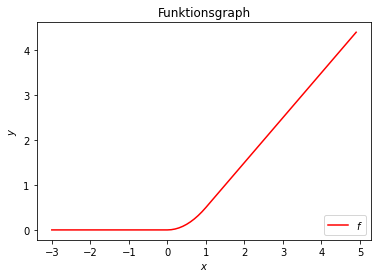

In [5]:
x = np.arange(-3,5,0.1)
y = np.zeros(x.shape[0])
for i in range(0,x.shape[0]):
    y[i] = f(x[i])
plt.plot(x,y, color='red', label='$f$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Funktionsgraph')
plt.legend(loc='lower right')
plt.show()

## Übung 3b)

Schreiben Sie eine Funktion, die jeder Komponente $x_i$ eines Vektors $x\in \mathbb{R}^n$ den Funktionswert der Stückweise definierten Funktion aus Übung 2 zuordnet und ohne die Verwendung von Schleifen auskommt.

Wiederholen Sie Übung 3 mit der neuen vektorisierten Funktion.

In [6]:
def f_vec(x):
    result = np.zeros(x.shape[0])
    result[x>=0] = 1/2 *x[x>=0]**2
    result[x>1] = x[x>1]-1/2
    return result

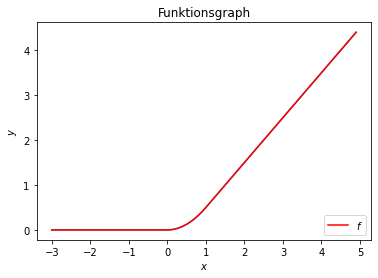

In [7]:
y = f_vec(x)
plt.plot(x,y)
plt.plot(x,y, color='red', label='$f$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Funktionsgraph')
plt.legend(loc='lower right')
plt.show()

## Übung 4

Schreiben Sie eine Funktion zur Bestimmung des drittgrößten Eintrags eines Vektors. Schreiben Sie diese Funktion allgemein, dass Sie ohne Aufwand auch z.B. den $k-$ten Eintrag eines Vektors der Länge $n\ge k$ bestimmen können. Testen Sie ihre Funktion am Vektor $(1,2,7,-5,3,10,1)^\top$. 

In [8]:
def kLargest(v, k = 3):
    vsort = -np.sort(-v) #Sortiere v absteigend
    result = vsort[k-1] #vsort[0] = largest, [1] 2nd largest, [3-1] 3rd largest
    return result

In [9]:
a = np.array([1,2,7,-5,3,10,1])
k_a = kLargest(a)
k_a

3

## Übung 5

Plotten Sie die Funktion $g(x) = (x_1^2-x_2)\cdot(x_1^2 - 3 x_2)$ auf $[-2,2]\times [-2,4]$. 

In [10]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [11]:
def g(x_1,x_2):
    result = (x_1**2-x_2)*(x_1**2-3*x_2)
    return result

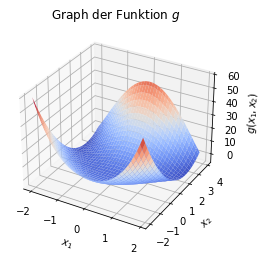

In [12]:
x = np.arange(-2,2,0.1)
y = np.arange(-2,4,0.1)
X,Y = np.meshgrid(x,y)
Z = g(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$g(x_1,x_2)$')
ax.set_title('Graph der Funktion $g$')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

## Übung 6
Lösen Sie das folgende unrestringierte nichtlineare Optimierungsproblem

$$\min_{x\in\mathbb{R}^2}\ 3x_1^2 + 2x_1x_2 + x_2^2 - 2x_1\quad \text{s.t.}\quad x_2 \geq 0$$

mit Hilfe der Funktion `minimize` des [SciPy-Pakets](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) `scipy.optimize`. Übergeben Sie `minimize` die Zielfunktion und deren Gradienten. Benutzen Sie den Startpunkt $x =(0; 0)^\top$.

In [13]:
from scipy.optimize import minimize

In [27]:
H = np.array([[6,2],[2,2]])
f = np.array([-2,0])
x0 = np.array([0.,0.])

def fun(x):
    return 0.5 * x @ H @ x + f @ x

def grad(x):
    return H @ x + f

bnds = [(None,None),(0,None)]

res = minimize(fun, x0, jac=grad, bounds=bnds, options={'disp':True})

In [15]:
res['x']

array([0.33333333, 0.        ])

In [29]:
res.x

array([0.33333333, 0.        ])

In [16]:
res['fun']

-0.3333333333333333

## Übung 7

Lösen Sie das Kleinste-Quadrate-Problem
$$P: \quad \min\limits_x \; ||Ax-b||_2$$ 
mit $A=\begin{pmatrix}1 & 2 \\ 4 & 5 \\ 3 & 3 \end{pmatrix}$ und $b=(3,9,1)^\top$. 

Wir benutzen dazu die Methode [lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq). 

In [25]:
A = np.array([[1,2],[4,5],[3,3]])
b = np.array([3,9,1])

res = np.linalg.lstsq(A, b, rcond=-1)
res[0]

array([-2.88888889,  3.77777778])

## Übung 8

Diese Aufgabe ist Stoff der Vorlesung "Nichtlineare Optimierung". Da dieses Schnellkursskript auch für die Veranstaltung "Globale Optimierung" verwendet wird, werden für diese Veranstaltung im Ordner zu den Schnellkursen ergänzende Informationen zur Verfügung gestellt. 

Gegeben sei das Optimierungsproblem 
$$RLS: \quad \min\limits_{\beta \in \mathbb{R}^n} \ ||X\beta-y\vert\vert_2^2+\lambda ||\beta ||_2^2$$
mit $X\in \mathbb{R}^{m\times n}$, $y\in \mathbb{R}^m$ und $\lambda>0$. 

Laden Sie sich die Datei <i> Poly-Fit.npz </i> aus dem Ilias-Kursordner herunter. Diese enthält zwei Dateien: einen Trainingsdatensatz $x,y$ und einen Testdatensatz $x_{test}, y_{test}$. 

a) Bestimmen Sie ein Polynom 7. Grades, welches die Punkte im Trainings-Datensatz möglichst gut approximiert. Lösen Sie dazu ein Problem der Form $RLS$ und plotten Sie Ihre Ergebnisse für die $\lambda$-Werte $0, 10^{-8}, 10^{-2}, 1$. Benutzen Sie die Aufgaben 1 und 2 der 1. Übung. Für die Lösung $\beta^\star$ des Problems $RLS$ gilt
\begin{align} (X^T X +\lambda I )\beta^\star = X^T y. \quad (1) \end{align} 
(Dieser Zusammenhang wird in Übung 5 hergeleitet.)


In [18]:
data = np.load('Poly_Fit.npz')
x = data['x']
y = data['y']
x_test = data['x_test']
y_test = data['y_test']

In [31]:
poly_deg = 7
lambda_list = [0, 1e-8, 1e-2, 1]
X = np.flip(np.vander(x, poly_deg + 1), 1)


In [20]:
def polynom(x, beta, deg):
    vander = np.flip(np.vander(x, deg + 1), 1)
    return vander @ beta

Um das Problem $RLS$ zu lösen, genügt es das Gleichungssystem (1) nach $\beta^\star$ zu lösen. 

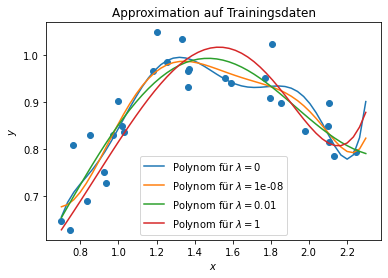

In [21]:
for lam in lambda_list:
    x_plot = np.linspace(0.7, 2.3, 50)
    sol = np.linalg.solve(X.transpose() @ X + lam * np.eye(poly_deg + 1), X.transpose() @ y)
    pred = polynom(x_plot, sol, poly_deg)
    #fig = plt.figure()
    plt.plot(x_plot, pred, label='Polynom für $\lambda=$'+str(lam))
plt.scatter(x,y) 
plt.title('Approximation auf Trainingsdaten')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

(b) Untersuchen Sie für welchen Wert $\lambda \in \{0, 10^{-8}, 10^{-2}, 0\}$ das in Teilaufgabe (a) bestimmte Polynom den Test-Datensatz am besten approximiert, in dem Sinne, dass die Summe der Fehlerquadrate am kleinsten ist. Plotten Sie dieses anschließend mit den Testdaten. Plotten Sie zusätzlich auch das Polynom, dass die Testdaten am schlechtesten approximiert.

In [22]:
pred_error = []

for lam in lambda_list:
    sol = np.linalg.solve(X.transpose() @ X + lam * np.eye(poly_deg + 1), X.transpose() @ y)
    pred = polynom(x_test, sol, poly_deg)
    pred_error.append(np.linalg.norm(y_test-pred)**2)
 
print(pred_error)

[0.13137101910466514, 0.10855905527374084, 0.0852966319004869, 0.10876011551888226]


Folglich erhält man für $\lambda = 1e-2$ das Polynom, welches den Test-Datensatz am besten approximiert und für $\lambda=0$ das Polynom, das den Testdatensatz am schlechtesten approximiert.

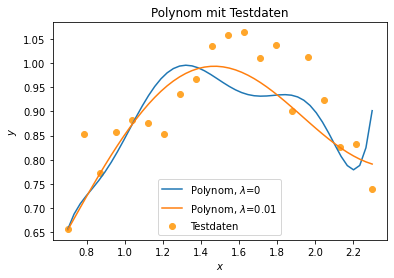

In [23]:
for lam in [0, 1e-2]:
    
# lam = 1e-2
    x_plot = np.linspace(0.7, 2.3, 50)
    sol = np.linalg.solve(X.transpose() @ X + lam * np.eye(poly_deg + 1), X.transpose() @ y)
    pred = polynom(x_plot, sol, poly_deg)


    #fig = plt.figure()
    plt.title('Polynom mit Testdaten')
    plt.plot(x_plot,pred, label='Polynom, $\lambda$='+str(lam))
plt.scatter(x_test,y_test, color='xkcd:mango', label='Testdaten')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()